In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context='paper')

## Training Time Comparison

In [2]:
ml_times = pd.read_csv('ml_training_time.csv')
ml_times['Approach'] = 'LogReg'

In [3]:
ml_times = pd.melt(
    ml_times,
    value_vars=["E-Shopper", "Train Ticket"],
    id_vars="Approach",
    value_name="Training Time (s)",
    var_name="Dataset",
)

In [4]:
grammar_times = pd.read_csv('grammar_training_time.csv')
grammar_times['Approach'] = 'Grammar'
grammar_times.rename(columns={'TrainTicket': 'Train Ticket'}, inplace=True)

In [5]:
grammar_times = pd.melt(
    grammar_times,
    value_vars=["E-Shopper", "Train Ticket"],
    id_vars="Approach",
    value_name="Training Time (s)",
    var_name="Dataset",
)

c:\Users\giord\miniconda3\envs\icpe\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\giord\miniconda3\envs\icpe\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\giord\miniconda3\envs\icpe\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\giord\miniconda3\envs\icpe\lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.

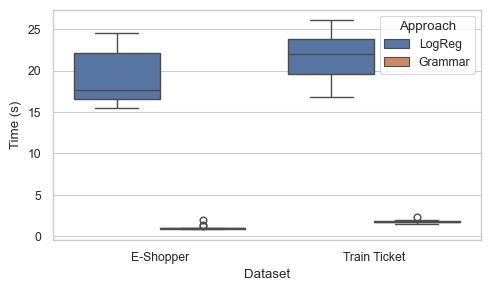

In [6]:
plt.figure(figsize=(5,3))
sns.boxplot(data=pd.concat([ml_times, grammar_times]), x='Dataset', y='Training Time (s)', hue='Approach')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.savefig('trainingtimes.pdf')
plt.show()

## Metrics comparison

In [57]:
ml_eshopper = pd.read_csv('metrics_eshopper.csv')
ml_trainticket = pd.read_csv('metrics_trainticket.csv')

In [58]:
ml_scores = pd.concat([ml_eshopper, ml_trainticket])
ml_scores['Approach'] = 'LogReg'

In [59]:
grammar_scores = pd.DataFrame(
    {
        "Accuracy": [0.8830531634889629, 0.7984613204300205],
        "Precision": [0.8969048470781599, 0.7676894073226088],
        "Recall": [0.8830531634889629,0.7984613204300205],
        "Approach": "Grammar",
        "Dataset": ["E-Shopper", "Train Ticket"],
    }
)

In [60]:
scores = pd.concat([ml_scores, grammar_scores])

In [61]:
scores = pd.melt(scores, id_vars=['Approach', 'Dataset'], value_name='Score', var_name='Metric')

c:\Users\giord\miniconda3\envs\icpe\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


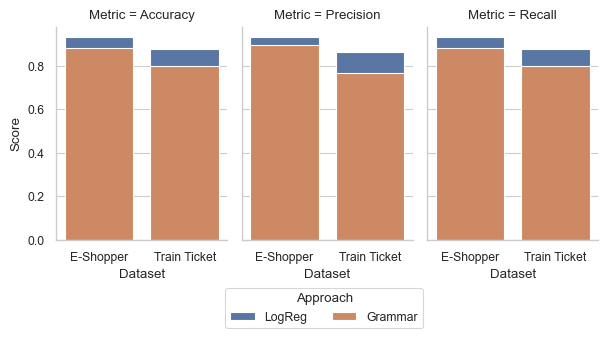

In [97]:
# fig, ax = plt.subplots(figsize=(3,5))
g = sns.FacetGrid(scores, col="Metric", hue = 'Approach',height=3, aspect=0.7)
plt.tight_layout()
g.map(sns.barplot, "Dataset", "Score").add_legend(
    loc="lower center", bbox_to_anchor=(0.42, -0.13), ncols=2, frameon=True)
plt.savefig("metrics.pdf", bbox_inches="tight")
plt.show()